In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#read dataset
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [3]:
#summary info on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           768 non-null    float64
 1   X2           768 non-null    float64
 2   X3           768 non-null    float64
 3   X4           768 non-null    float64
 4   X5           768 non-null    float64
 5   X6           768 non-null    int64  
 6   X7           768 non-null    float64
 7   X8           768 non-null    int64  
 8   Y1           768 non-null    float64
 9   Y2           768 non-null    float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(10), int64(2)
memory usage: 72.1 KB


In [4]:
#checking for missing values
df.isnull().sum()

X1               0
X2               0
X3               0
X4               0
X5               0
X6               0
X7               0
X8               0
Y1               0
Y2               0
Unnamed: 10    768
Unnamed: 11    768
dtype: int64

In [5]:
#droped unnamed columns
df = df.drop(['Unnamed: 10','Unnamed: 11'],axis=1)

In [6]:
#read first 5 rows
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
#rename columns
rename_df_columns = {
    'X1':'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load',
}
df = df.rename(columns = rename_df_columns)

In [8]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
#veriying values of glazing.......
df['Glazing Area Distribution'].sum()

2160

<AxesSubplot:xlabel='Orientation'>

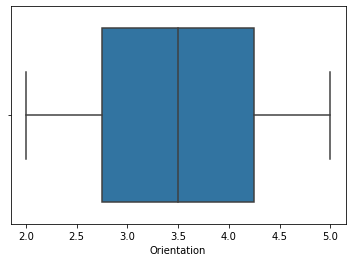

In [10]:
#checking for outliers univariate
sns.boxplot(x=df['Orientation'])

<AxesSubplot:>

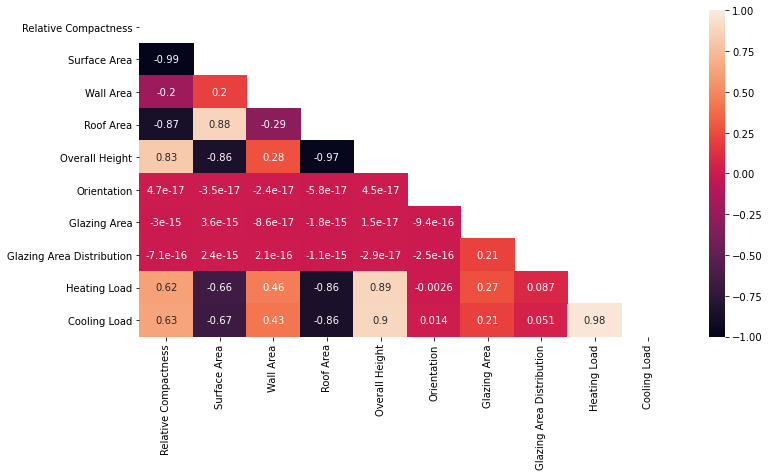

In [11]:
df.corr()
plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True)

In [12]:
simple_linear_reg_df = df[['Relative Compactness','Cooling Load']].sample(10,random_state=2)
simple_linear_reg_df

,Relative Compactness,Cooling Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


<AxesSubplot:xlabel='Relative Compactness', ylabel='Cooling Load'>

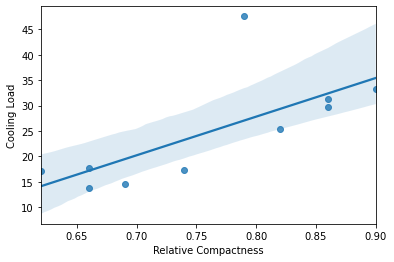

In [13]:
sns.regplot(x= 'Relative Compactness', y='Cooling Load',data=simple_linear_reg_df)

In [14]:
# Doing MinMax scaling for Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalize_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
features_df = normalize_df.drop(columns=['Heating Load','Cooling Load'])
heating_df = normalize_df['Heating Load']
cooling_df = normalize_df['Cooling Load']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features_df,heating_df,test_size=0.3,random_state=1)


In [16]:
from sklearn import metrics

In [17]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
predicted_value_1=linear_model.predict(x_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_1 = mean_absolute_error(y_test,predicted_value_1)
round(mae_1,3)

0.063

In [19]:
rss_1 = np.sum(np.square(y_test - predicted_value_1))
round(rss_1,3)

1.817

In [20]:
rmse_1 = np.sqrt(mean_squared_error(y_test,predicted_value_1))
round(rmse_1,3)

0.089

In [21]:
r2_score_1 = r2_score(y_test,predicted_value_1)
round(r2_score_1,3)

0.894

In [22]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)
predicted_value_2 = ridge_reg.predict(x_test)

In [23]:
mae_2 = mean_absolute_error(y_test,predicted_value_2)
round(mae_2,3)

0.064

In [24]:
rss_2 = np.sum(np.square(y_test - predicted_value_2))
round(rss_2,3)

1.848

In [25]:
rmse_2 = np.sqrt(mean_squared_error(y_test,predicted_value_2))
round(rmse_2,3)

0.089

In [26]:
r2_score_2 =  metrics.r2_score(y_test,predicted_value_2)
round(r2_score_2,3)

0.892

In [27]:
lasso_reg = Lasso(alpha=0.001) 
lasso_reg.fit(x_train, y_train)
predicted_value_3 = lasso_reg.predict(x_test)

In [28]:
mae_3 = mean_absolute_error(y_test,predicted_value_3)
round(mae_3,3)

0.066

In [29]:
rss_3 = np.sum(np.square(y_test - predicted_value_3))
round(rss_3,3)

1.92

In [30]:
rmse_3 = np.sqrt(mean_squared_error(y_test,predicted_value_3))
round(rmse_3,3)

0.091

In [31]:
r2_score_3 = metrics.r2_score(y_test,predicted_value_3) 

round(r2_score_3,3)

0.888

In [32]:
#comparing the effects of regularisation 
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index() 
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df



In [33]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight') 
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight') 


In [34]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features') 
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative Compactness,-0.606412,-0.283471,-0.027719
1,Roof Area,-0.328099,-0.163192,-0.000000
2,Surface Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall Area,0.018947,0.103061,0.200087
5,Glazing Area Distribution,0.028452,0.029088,0.021431
6,Glazing Area,0.215042,0.212449,0.206132
7,Overall Height,0.393549,0.442467,0.463482
